In [55]:
import pandas as pd 
import numpy as np 
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt 
import seaborn as sn
import os 
from statsmodels.graphics.regressionplots import influence_plot
import pylab as py
import statsmodels.api as st
from sklearn.model_selection import cross_val_predict

In [2]:
dataset = pd.read_csv(r"C:\\Users\\Adith\\Desktop\\Data Science_Excel R\\home assignments\\multi linear regression\\50_Startups.csv")

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#computing descriptive stats
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
#checking for information of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# EDA and Visualisation

In [6]:
#checking for null values 
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
#checking for correlation matrix
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


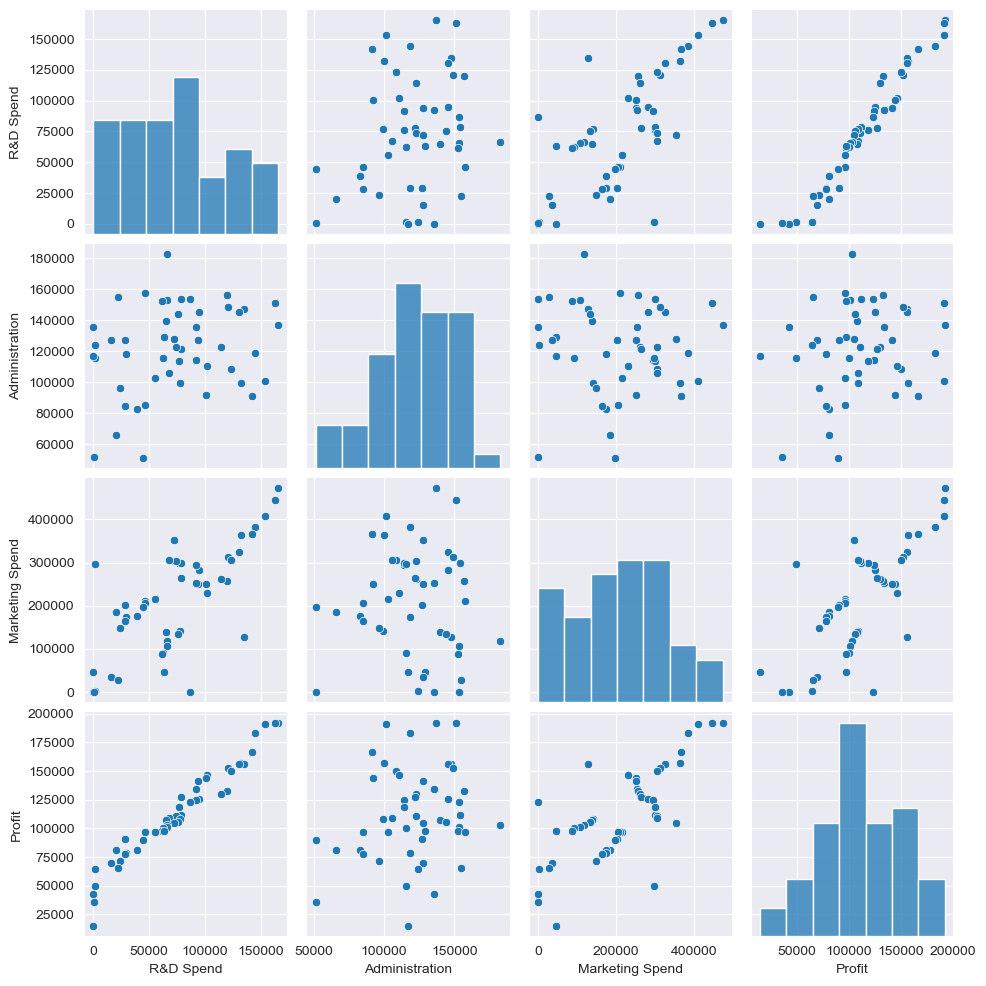

In [8]:
#plotting scatter plot for all variables 
sn.set_style(style = 'darkgrid')
sn.pairplot(dataset)
plt.show()

In [9]:
#Renaming the features 
dataset = dataset.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MS','Profit':'PFT'},axis = 1)
dataset.head()

,RDS,Admin,MS,State,PFT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Transformation

In [10]:
#since state is categorical converting to numerical using dummification
dataset2 = pd.get_dummies(dataset,columns =['State'],drop_first = True)
dataset2.head()

,RDS,Admin,MS,PFT,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [11]:
#checking correlation with new dataset
dataset2.corr()

,RDS,Admin,MS,PFT,State_Florida,State_New York
RDS,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Admin,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
PFT,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


# Building our first model

In [12]:
#building up our first model 
model_1 = sm.ols("PFT~RDS+Admin+MS",data = dataset2).fit()

In [13]:
#checking the coefficients of the variables
model_1.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [14]:
#cumulating our summary on model_1
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PFT   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        17:06:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# computing our VIF

In [15]:
#calculating ViF values for independent variables
#collinearity check
rsq_RDS = sm.ols("RDS~Admin+MS",data = dataset2).fit().rsquared
vif_RDS = 1/(1-rsq_RDS)

In [16]:
rsq_Admin = sm.ols("Admin~RDS+MS",data = dataset2).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)

In [17]:
rsq_MS = sm.ols("MS~Admin+RDS",data = dataset2).fit().rsquared
vif_MS = 1/(1-rsq_MS)

In [18]:
#storing VIF values in a Dataframe 
d1 = {'Variables':['RDS','Admin','MS'],'VIF':[vif_RDS,vif_Admin,vif_MS]}
vif_Frame = pd.DataFrame(d1)
vif_Frame

,Variables,VIF
0,RDS,2.468903
1,Admin,1.175091
2,MS,2.326773


In [19]:
#since none of the variables have vif>5 we have to consider all variables 

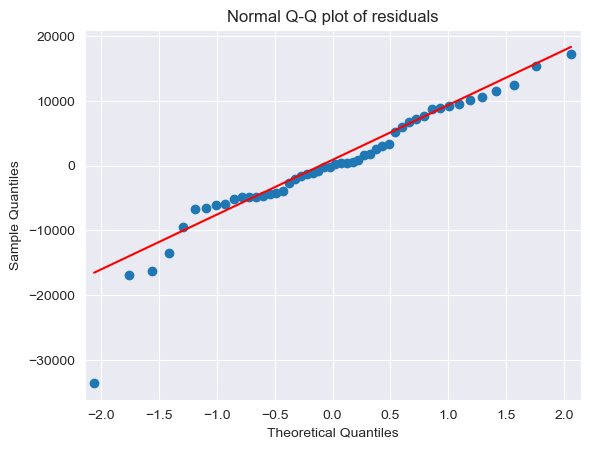

In [20]:
#checking for normality of  residuals by qq plot 
st.qqplot (model_1.resid,line = 'q')
plt.title("Normal Q-Q plot of residuals")
py.show()

In [21]:
#test to check whether it shows homoscedacity ot heteroscedacity 
def standard_values(vals): return (vals-vals.mean())/vals.std()

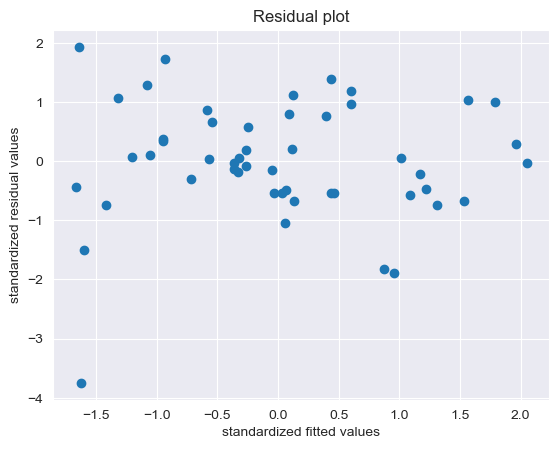

In [22]:
#residual scatter plot 
plt.scatter(standard_values(model_1.fittedvalues),standard_values(model_1.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

# Model deletion diagnostics

In [23]:
#model deletion diagnostics (checking for outliers or influencers)
#checking with cooks distance 
(d,_)= model_1.get_influence().cooks_distance
d

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

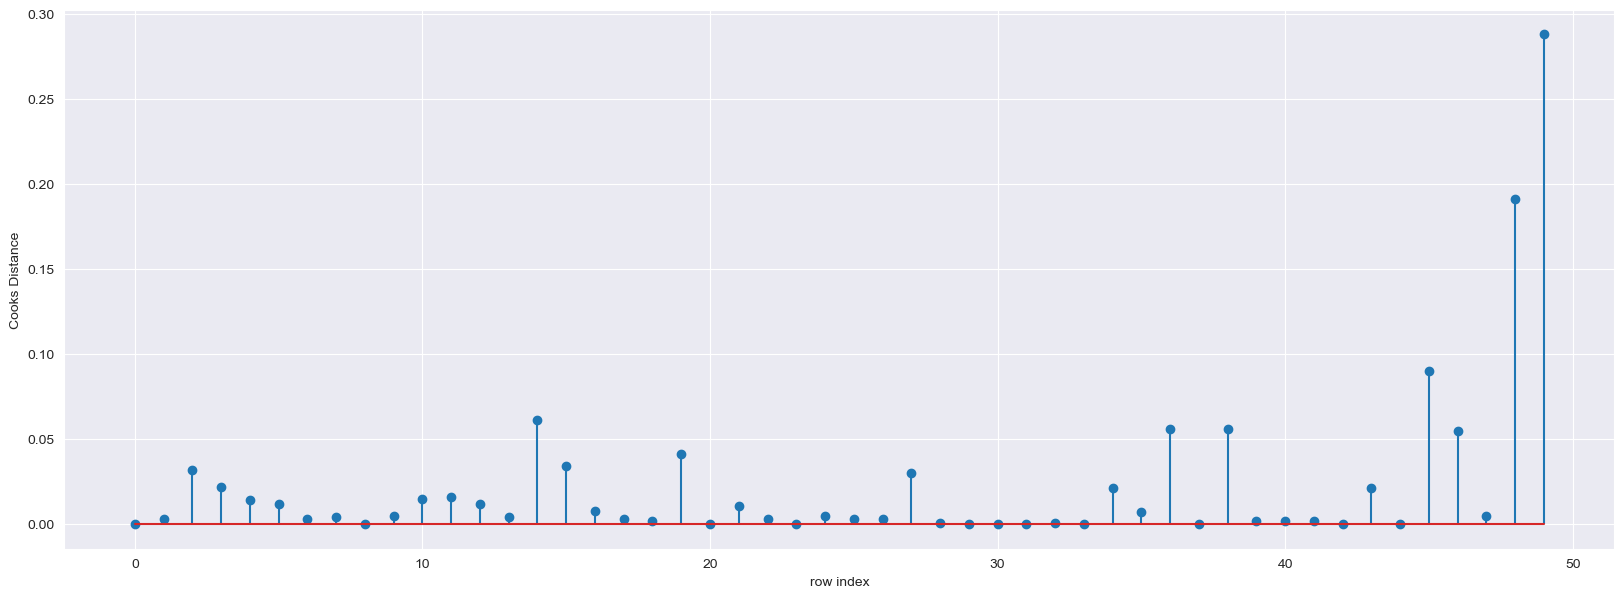

In [24]:
#plot the influencers using the stem plot 
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(dataset2)),np.round(d,3))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [25]:
#locating the value that influencing our plot 
np.argmax(d),np.max(d)

(49, 0.28808229275432634)

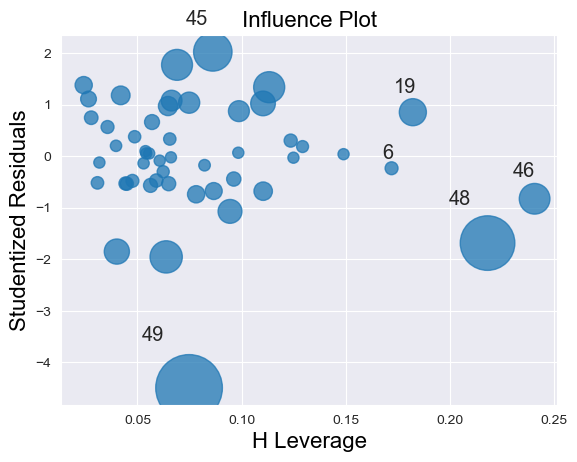

In [26]:
#computing out leverage value using high influence plot: points beyond our leverge_cutoff value are outliers
influence_plot(model_1)
plt.show()

In [27]:
# as we know leverage cutoff value is 3(k+1)/n
k = dataset2.shape[1]
n = dataset2.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.42000000000000004

In [28]:
#locating the influencer in our dataset
dataset2[dataset2.index.isin([48,49])]

,RDS,Admin,MS,PFT,State_Florida,State_New York
48,542.05,51743.15,0.00,35673.41,0,1
49,0.00,116983.80,45173.06,14681.40,0,0


In [29]:
#since we know our influencer dropping the influencer and reset the dataset
dataset3 = dataset2.drop(dataset.index[[48,49]],axis = 0).reset_index(drop = True)
dataset3

,RDS,Admin,MS,PFT,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [30]:
#building our new model with our dataset 
model_2 = sm.ols("PFT~RDS+Admin+MS",data = dataset3).fit()

In [31]:
#checking once again with influencer plot for our new model 
(c,_)= model_2.get_influence().cooks_distance
c

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

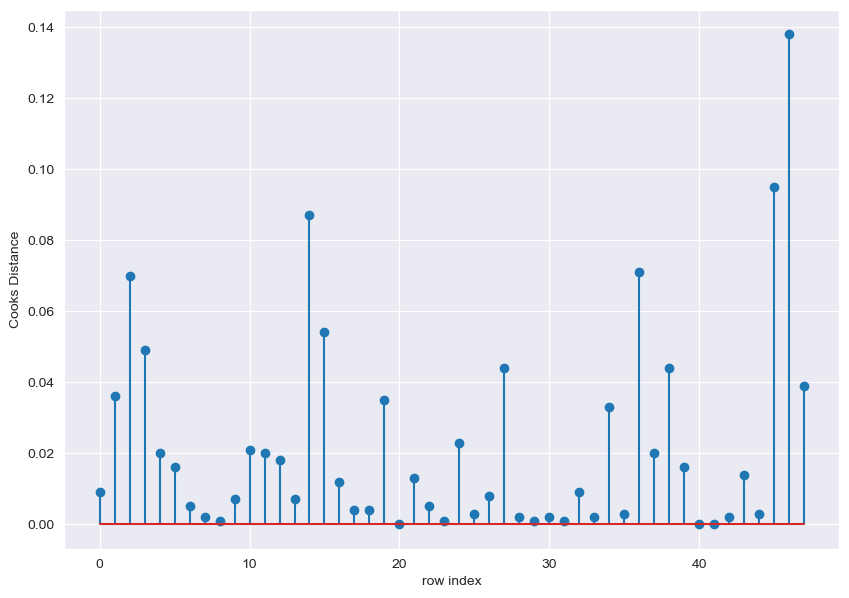

In [32]:

#plot the influencers using the stem plot 
fig = plt.figure(figsize = (10,7))
plt.stem(np.arange(len(dataset3)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
#locating the values that influencing our plot 
np.argmax(c),np.max(c)

(46, 0.13829133994334772)

In [34]:
 #calculating the r square for our new model 
(model_2.rsquared,model_2.aic)

(0.9626766170294073, 994.6690439260116)

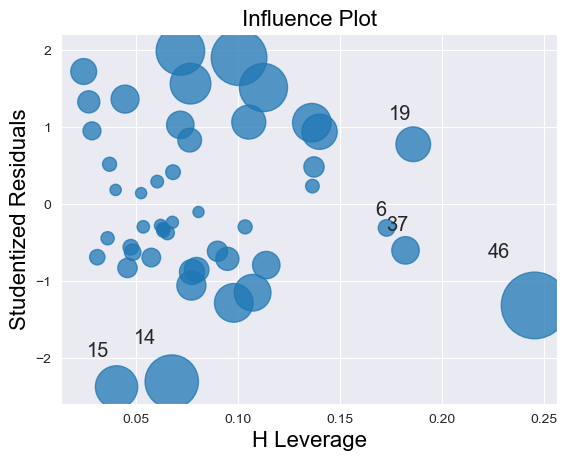

In [35]:
#computing out leverage value using high influence plot: points beyond our leverge_cutoff value are outliers
influence_plot(model_2)
plt.show()

In [36]:
# as we know leverage cutoff value is 3(k+1)/n
k = dataset3.shape[1]
n = dataset3.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.4375

# Building our model with new dataset

In [37]:
#building our new model with our dataset 
model_3 = sm.ols("PFT~RDS+Admin+MS",data = dataset3).fit()

In [38]:
#checking once again with influencer plot for our new model 
(p,_)= model_3.get_influence().cooks_distance
p

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

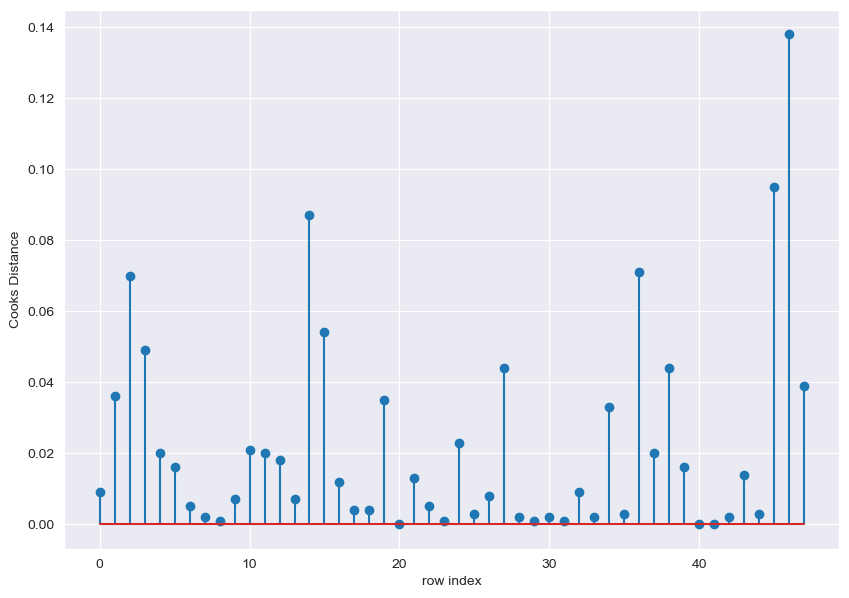

In [39]:

#plot the influencers using the stem plot 
fig = plt.figure(figsize = (10,7))
plt.stem(np.arange(len(dataset3)),np.round(p,3))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
#checking again if any outliers 
np.argmax(p),np.max(p)

(46, 0.13829133994334772)

In [41]:
#calculating the accuracy of our new model 
(model_3.rsquared,model_3.aic)

(0.9626766170294073, 994.6690439260116)

In [42]:
model_3.params


Intercept    59098.493334
RDS              0.789495
Admin           -0.063349
MS               0.016895
dtype: float64

In [43]:
#since our accuracy of model is at 96% we can now further continue with our predictions
#since the value is less we stop our diagnostic here 

# Predictions 

In [44]:
#model predictions
dataset3.describe()

,RDS,Admin,MS,PFT,State_Florida,State_New York
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,76782.056875,122885.521458,218876.704792,115630.773958,0.333333,0.333333
std,44244.036139,26692.701530,118303.028079,36807.552792,0.476393,0.476393
min,0.000000,51283.140000,0.000000,42559.730000,0.000000,0.000000
25%,45528.002500,105077.645000,136984.482500,95036.680000,0.000000,0.000000
50%,74661.715000,123467.895000,221897.880000,108643.015000,0.000000,0.000000
75%,105065.712500,145190.700000,300632.782500,142253.990000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000


In [45]:
#table containing r square for each model 
d4 = {'prep models':['model_1','model_2','model_3'],'Rsquared':[model_1.rsquared,model_2.rsquared,model_3.rsquared]}
table = pd.DataFrame(d4)
table

,prep models,Rsquared
0,model_1,0.950746
1,model_2,0.962677
2,model_3,0.962677


In [46]:
#storing the data of independent variables for our predictions 
ind_data = pd.DataFrame({'RDS':76782,'Admin':122885,'MS':218876},index =[0])
ind_data

,RDS,Admin,MS
0,76782,122885,218876


In [47]:
#manual prediction of data
model_3.predict(ind_data)

0    115630.750182
dtype: float64

In [48]:
#automatic predictions on our model at 96.2%
predictions = model_3.predict(dataset3)
predictions

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

In [65]:
X = model_3.fittedvalues
Y = predictions

In [66]:
#plotting for true values and predicted value
X


0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

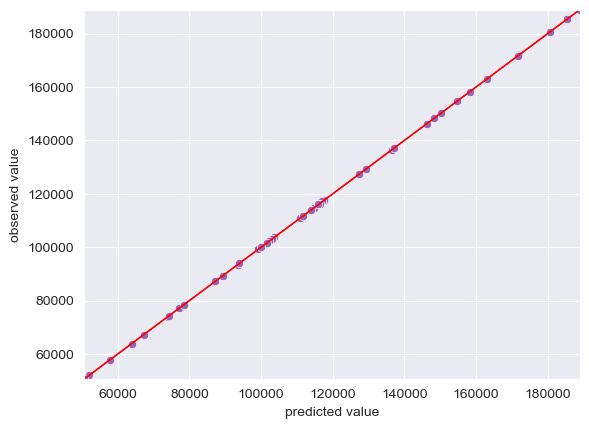

In [72]:
Y_max = Y.max()
Y_min =Y.min()
ax = sn.scatterplot(x = X,y = Y)
ax.set(ylim = (Y_min,Y_max))
ax.set(xlim =(Y_min,Y_max))
ax.set_xlabel("predicted value")
ax.set_ylabel("observed value")
X_ref = Y_ref = np.linspace(Y_min,Y_max,100)
plt.plot(X_ref,Y_ref,color = 'red',linewidth = 1)
plt.show()